In [57]:
import os
import cv2
import math
import json
import glob
import random
import numpy as np
import pandas as pd
from PIL import Image
from collections import namedtuple
from matplotlib import pyplot as plt

VOC_CLASSES = [
    "background",
    "foot"
    "hand"
    "arm"
    "leg"
    "torso"
    "head"
]

random.seed(0)
NUM_CLASSES = 7
BODY_COLORMAP = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(NUM_CLASSES)]
 

In [58]:
# get classes list from image path        
def get_classes_names(path, class_names):
    gray = cv2.imread(path, 0)
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret_list = []
    for i in np.unique(gray): ret_list.append(class_names[i])
    return ret_list


def get_class_dist_df(filename):
    with open(filename, 'r') as f:
        data = f.readlines()

    dict_data = [json.loads(val) for val in data]
    df = pd.DataFrame(dict_data)
    
    # dict of classes. 1:contain class, 0:NO class
    classes = {val:[] for val in VOC_CLASSES}
    image_ids = []
    
    for index, row in df.iterrows():
        label_path = row['fpath_segm']
        img_id = label_path.split('/')[-1].split('.')[0]

        image_ids.append(img_id)
        tmp_classes = get_classes_names(label_path, VOC_CLASSES)

        for k, v in classes.items():
            if k in tmp_classes:
                classes[k].append(1)
            else:
                classes[k].append(0)

    df['id'] = image_ids

    for k, v in classes.items():
        df[k] = classes[k]
        
    return df


def color_im(img, colors):
    for i in range(len(colors)):
        img[:,:,0][np.where(img[:,:,0] == i)] = colors[i][0]
        img[:,:,1][np.where(img[:,:,1] == i)] = colors[i][1]
        img[:,:,2][np.where(img[:,:,2] == i)] = colors[i][2]
    return img

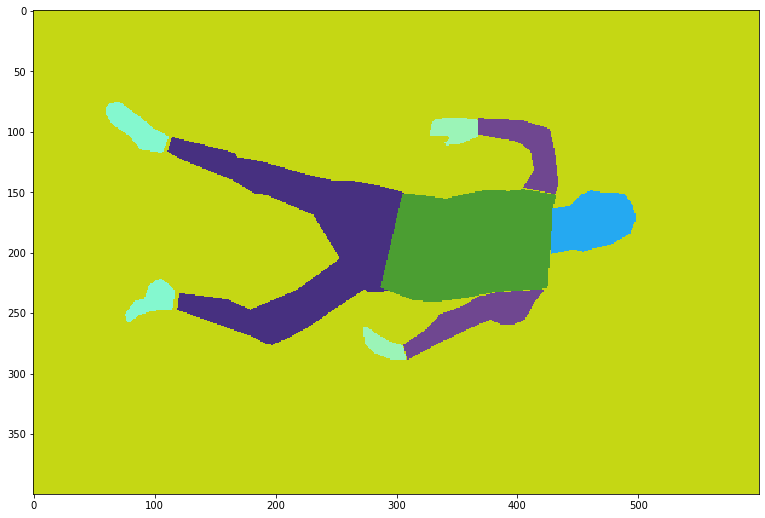

In [59]:
img_path = "/data/sara/semantic-segmentation-pytorch/all_body_part_annotations/29800522.14.png"

colored_seg = cv2.imread(img_path)
plt.figure(figsize=(13, 13))
plt.imshow(color_im(colored_seg,BODY_COLORMAP))
plt.show()

## Parsing the tags

In [60]:
filename = "/data/sara/DecompositionFeatureSegmentation/data/tags.csv.20210523.poly"
df = pd.read_csv(filename ,  delimiter = ',', names = ['_id', 'user', 'location', 'image', 'tag', 'created', '__v'])

In [61]:
df.head()

,_id,user,location,image,tag,created,__v
0,ObjectId(5f4d4863b07cb440df6b7207),ObjectId(5c51a34d3e6b3a00341e1861),"[{""type"":""polygon"",""geometry"":{""points"":[{""x"":...",sara_img/151/15110401.10.JPG,purge,2019-02-12T00:08:55.329Z,0
1,ObjectId(5f4d4863b07cb440df6b7206),ObjectId(5c51a34d3e6b3a00341e1861),"[{""type"":""polygon"",""geometry"":{""points"":[{""x"":...",sara_img/151/15110401.10.JPG,purge,2019-02-12T00:08:19.760Z,0
2,ObjectId(5f4d4863b07cb440df6b7208),ObjectId(5c51a34d3e6b3a00341e1861),"[{""type"":""polygon"",""geometry"":{""points"":[{""x"":...",sara_img/151/15110401.10.JPG,bone,2019-02-12T00:16:33.306Z,0
3,ObjectId(5f4d4863b07cb440df6b720b),ObjectId(5c51a34d3e6b3a00341e1861),"[{""type"":""polygon"",""geometry"":{""points"":[{""x"":...",sara_img/151/15110401.11.JPG,purge,2019-02-12T00:22:38.972Z,0
4,ObjectId(5f4d4863b07cb440df6b720d),ObjectId(5c51a34d3e6b3a00341e1861),"[{""type"":""polygon"",""geometry"":{""points"":[{""x"":...",sara_img/151/15110401.13.JPG,maggots,2019-02-12T00:25:50.683Z,0


In [62]:
clean_df = pd.DataFrame()
for index, row in df.iterrows():
    tags = row['tag'].split(';')
    for tag in tags:
        row['tag'] = tag.lower().strip()
        clean_df = clean_df.append(row)


In [63]:
len(clean_df['tag'].unique())

131

In [64]:
classes = {val:[] for val in clean_df['tag'].unique()}
image_ids = []
image_paths = []
image_annotations = []

for index, row in df.iterrows():
    img_name = row['image'].split('/')[-1]
    img_path = "/usb/sara_img/" + img_name
    img_id = img_name.split('.')[0]
    
    if img_id not in image_ids:
        image_ids.append(img_id)
        tmp_classes = df[df['image'] == row['image']]['tag'].unique()

        for k, v in classes.items():
            if k in tmp_classes:
                classes[k].append(1)
            else:
                classes[k].append(0)
            
df['id'] = image_ids

for k, v in classes.items():
    df[k] = classes[k]
    '''

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [65]:
df[df['image'] == row['image']]['tag'].unique()

array(['purge', 'bone', 'skeletonization', 'background', 'foot', 'torso',
       'leg', 'legs', 'bone exposure;bone', 'plastic', 'hips'],
      dtype=object)

In [47]:
classes

{'purge': [],
 'bone': [],
 'maggots': [],
 'zip tie': [],
 'skeletonization': [],
 'plastic': [],
 'legs': [],
 'fly': [],
 'background': [],
 'mesh bag': [],
 'mummification': [],
 'stake': [],
 'scale': [],
 'adipocere': [],
 'tag': [],
 'head': [],
 'face': [],
 'discoloration': [],
 'hand': [],
 'arm': [],
 'torso': [],
 'mold': [],
 'skeletonizatoin': [],
 'hair': [],
 'marbling': [],
 'mesh': [],
 'foot': [],
 'eggs': [],
 'tattoo': [],
 'skin slippage': [],
 'leg': [],
 'scavenging': [],
 'cage': [],
 'backgorund': [],
 'back': [],
 'hips': [],
 'fresh skin': [],
 'darkened skin': [],
 'bone exposure': [],
 'glossy skin': [],
 'beetle': [],
 'flies': [],
 'remove': [],
 'maggot': [],
 'cannot see tags': [],
 'distal radius': [],
 'bone exposure distal humerus': [],
 'carpals': [],
 'pelvis': [],
 'mummification skull': [],
 'cranium': [],
 'remove?': [],
 'exposed bone': [],
 'larvae': [],
 'maggot eggs': [],
 'moist skin': [],
 'desiccated skin': [],
 'adult fly': [],
 'lividi

In [61]:
seg = cv2.imread(img_path2, 0)
seg.shape

(1024, 2048)

In [62]:
for i in np.unique(seg):
    print(i, CLASS_MAP[i])

0 unlabeled
1 ego vehicle
3 out of roi
4 static
7 road
8 sidewalk
11 building
17 pole
20 traffic sign
21 vegetation
22 terrain
23 sky
24 person
25 rider
26 car
33 bicycle


In [63]:
np.unique(seg)

array([ 0,  1,  3,  4,  7,  8, 11, 17, 20, 21, 22, 23, 24, 25, 26, 33],
      dtype=uint8)

In [64]:
def color_image(path, colors):
    img = cv2.imread(path)
    for i in range(len(colors)):
        img[:,:,0][np.where(img[:,:,0] == i)] = colors[i][0]
        img[:,:,1][np.where(img[:,:,1] == i)] = colors[i][1]
        img[:,:,2][np.where(img[:,:,2] == i)] = colors[i][2]
    return img

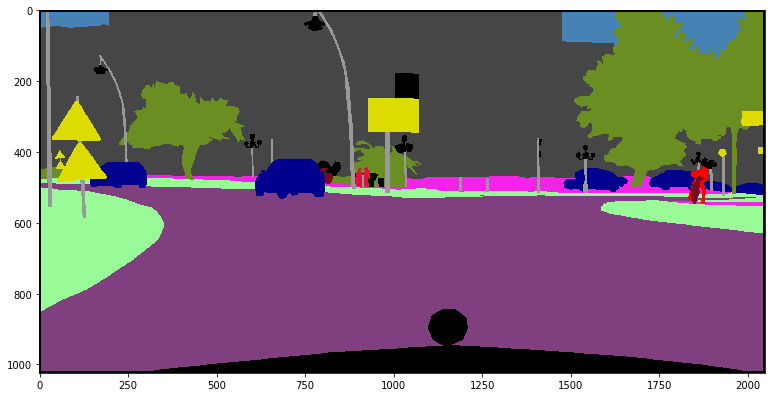

In [66]:
colored_seg = color_image(img_path2, COLOR_MAP)
plt.figure(figsize=(13, 13))
plt.imshow(colored_seg)
plt.show()

In [67]:
COLOR_MAP

{0: (0, 0, 0),
 1: (0, 0, 0),
 2: (0, 0, 0),
 3: (0, 0, 0),
 4: (0, 0, 0),
 5: (111, 74, 0),
 6: (81, 0, 81),
 7: (128, 64, 128),
 8: (244, 35, 232),
 9: (250, 170, 160),
 10: (230, 150, 140),
 11: (70, 70, 70),
 12: (102, 102, 156),
 13: (190, 153, 153),
 14: (180, 165, 180),
 15: (150, 100, 100),
 16: (150, 120, 90),
 17: (153, 153, 153),
 18: (153, 153, 153),
 19: (250, 170, 30),
 20: (220, 220, 0),
 21: (107, 142, 35),
 22: (152, 251, 152),
 23: (70, 130, 180),
 24: (220, 20, 60),
 25: (255, 0, 0),
 26: (0, 0, 142),
 27: (0, 0, 70),
 28: (0, 60, 100),
 29: (0, 0, 90),
 30: (0, 0, 110),
 31: (0, 80, 100),
 32: (0, 0, 230),
 33: (119, 11, 32),
 34: (0, 0, 142)}

In [ ]:
filename = '../supervised_odgts/VOCtrain_1000.odgt'

with open(filename, 'r') as f:
    data = f.readlines()
    
dict_data = [json.loads(val) for val in data]
df = pd.DataFrame(dict_data)

In [ ]:
# dict of classes. 1:contain class, 0:NO class
classes = {val:[] for val in VOC_CLASSES}
image_ids = []

for index, row in df.iterrows():
    label_path = row['fpath_segm']
    img_id = label_path.split('/')[-1].split('.')[0]
    
    image_ids.append(img_id)
    tmp_classes = get_classes_names(label_path, VOC_CLASSES)
    
    for k, v in classes.items():
        if k in tmp_classes:
            classes[k].append(1)
        else:
            classes[k].append(0)
            
df['id'] = image_ids

for k, v in classes.items():
    df[k] = classes[k]

In [ ]:
df.head()

In [ ]:
# df.to_csv('../data/voc_train_data.csv')

In [ ]:
val_df = get_class_dist_df('../val_odgts/VOCval_1000.odgt')
val_df.head()

In [ ]:
len(val_df)
# val_df.to_csv('../data/voc_val_data.csv')

In [ ]:
val_df.sum()

In [ ]:
df.sum()

In [ ]:
# instead of displaying random image, this will get the entire sequence for a labeled image

def get_unique_label_img(data):
    all_label_img = []
    for val in data:
        all_label_img.append(json.loads(val)['fpath_img'][0])
    all_label_img = list(set(all_label_img))
    return all_label_img

# get a seq for a label image 
def get_a_seq(data, label_img):
    a_seq_data = []
    for val in data:
        if label_img in val:
            a_seq_data.append(val)
            # raw_img = json.loads(val)['fpath_img'][1]
    return a_seq_data

In [ ]:
for c in VOC_CLASSES:
    print(c)
    print(df[df[c]==1]['fpath_img'])
    break